## **수능 Trend Visualization (3)**

+ 지난 글에서 spines, grid, legend를 정리했습니다.
+ grid를 넣으려고 minor tick도 설정해 보았구요.
+ 기본 데이터는 다 그렸는데, 이걸로는 아쉽습니다.
+ 메시지를 추출해서 전달해 봅시다.

### **5. 토달기 : annotate**

![](https://user-images.githubusercontent.com/72365693/105472661-914ae880-5cdf-11eb-80a8-5ae9ed6a3096.PNG)

+ **지원자 수**는 수능을 보겠다고 원서를 제출한 사람 수 이고
+ **응시자 수**는 실제로 가서 수능시험을 치른 사람 수 입니다.
+ 원서를 내놓고 보신 분들이 적지 않습니다. 심지어 늘어납니다.
+ 비율로 한번 구해봅시다.

### **5.1 파생변수 만들기 : 응시율**

+ 응시율을 이렇게 정의합니다 : `응시율 = 응시자 수 / 지원자 수 * 100`
+ 어차피 퍼센트로 표시할 것이라 처음부터 100을 곱했습니다.
+ 우리가 가지고 있는 pandas dataframe에 추가해 줍니다.

In [34]:
# 응시율 = 응시자 수 / 지원자 수
df_sn["num_test_rate"] = df_sn["num_test"]/df_sn["num_total"]*100
df_sn.head()

,year,num_total,num_M,num_F,cat_go3,cat_grad,cat_ged,num_test,score_avg,score_avg_M,score_avg_F,score_avg_go3,score_avg_grad,score_t50_avg,score_t50_avg_M,score_t50_avg_F,score_t50_avg_go3,score_t50_avg_grad,num_test_rate
0,1994,742668,437465,305203,521806,213459,7403,716326,49.2,49.7,48.5,49.0,49.6,61.7,62.6,60.2,NaN,NaN,96.453058
1,1994,750181,444612,305569,496617,243826,9738,726634,44.5,44.6,44.3,45.2,43.2,54.8,55.7,53.5,NaN,NaN,96.861158
2,1995,781749,452360,329389,477960,261492,42297,757488,49.7,49.7,49.8,51.2,47.8,63.2,63.3,60.7,NaN,NaN,96.896574
3,1996,840661,478707,361954,526833,300482,13346,809867,46.1,46.0,46.1,47.0,44.4,57.7,58.6,56.6,NaN,NaN,96.336930
4,1997,824374,472527,351847,545023,268044,11307,795338,42.7,42.4,43.1,43.6,40.8,54.1,55.1,52.9,NaN,NaN,96.477812


+ 맨 오른쪽에 **num_test_rate**가 생겼습니다.

### **5.2 응시율 붙이기**

+ 데이터에 글자를 붙일 때는 `annotate()` 를 사용합니다.
+ 문법은 이렇습니다 : `Axes.annotate(self,text,xy,*args,**kwargs)`

+ 들어가는 인자가 제법 많습니다. 자칫 복잡하게 느껴질 수 있으므로 몇 개만 봅시다.
+ 다른 인자는 다음 기회에 보고, 이만큼만 사용해서 그립니다.
    + **self** : 클래스 배울 때 나오죠? 뭐 넣으라는 뜻이 아니라 instance method라는 뜻입니다.
    + **text** : 표시될 글자입니다.
    + **xy** : 글자가 가리킬 지점의 좌표입니다.  
     **A ← B**를 넣는다면, **A**에 해당하는 지점입니다.
    + **xytext** : (옵션)글자가 위치할 지점의 좌표입니다.  
     **A ← B**를 넣는다면, **B**에 해당하는 지점입니다.
    + **arrowprops** : (옵션) 화살표를 어떻게 그릴지 정합니다.  
     **A ← B**를 넣는다면, ←에 해당하는 인자입니다.

+ `plot()`같은 명령은 설정 한번에 plot 전체에 적용됩니다.
+ 하지만 `.annotate()` 는 하나하나 그려줘야 합니다.
+ 손이 많이 갑니다. for loop을 사용합시다.

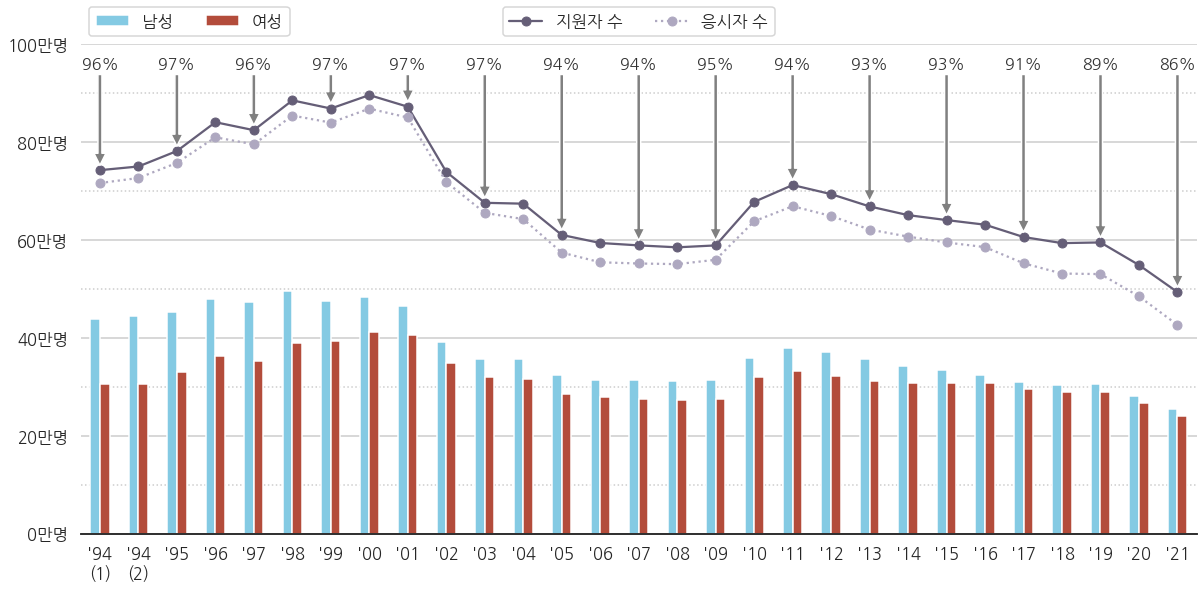

In [35]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"] # 범례 이름 변경
ax.legend(handles=handles, labels=labels)

ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2) # 범례 바꾸기


handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))
ax.add_artist(legend0)

# 응시율 붙이기 1: 데이터 순서 사용하기
for i in range(0, df_sn.shape[0], 2):                      # 데이터 순서 기준 하나 건너 하나에 적용
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',  # 글자 : 응시율. 소수점 떼고.
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), # A : 응시자 수 + 10000 지점
                xytext=(i,950000),                         # B : 여백. 950만명 지점
                arrowprops={"facecolor":"gray"},           # ← : 회색.
                horizontalalignment='center',              # 글자 : 가운데 정렬
                fontsize=16, color="k", alpha=0.8)         # 글자 크기=16, 색상=검정, 불투명도=0.8

+ 응시율이 숫자로 붙었습니다.
+ 방금 데이터를 하나 건너 하나 붙일 때, `for i in range(0,df_sn.shape[0],2)` 라고 했습니다.
+ 데이터의 순서를 사용하는 방법입니다. index가 점프하거나 중복될 때 사용하기 좋습니다.

+ index 기준으로 하나씩 건너뛰고 싶다면, 이렇게 고치면 됩니다.

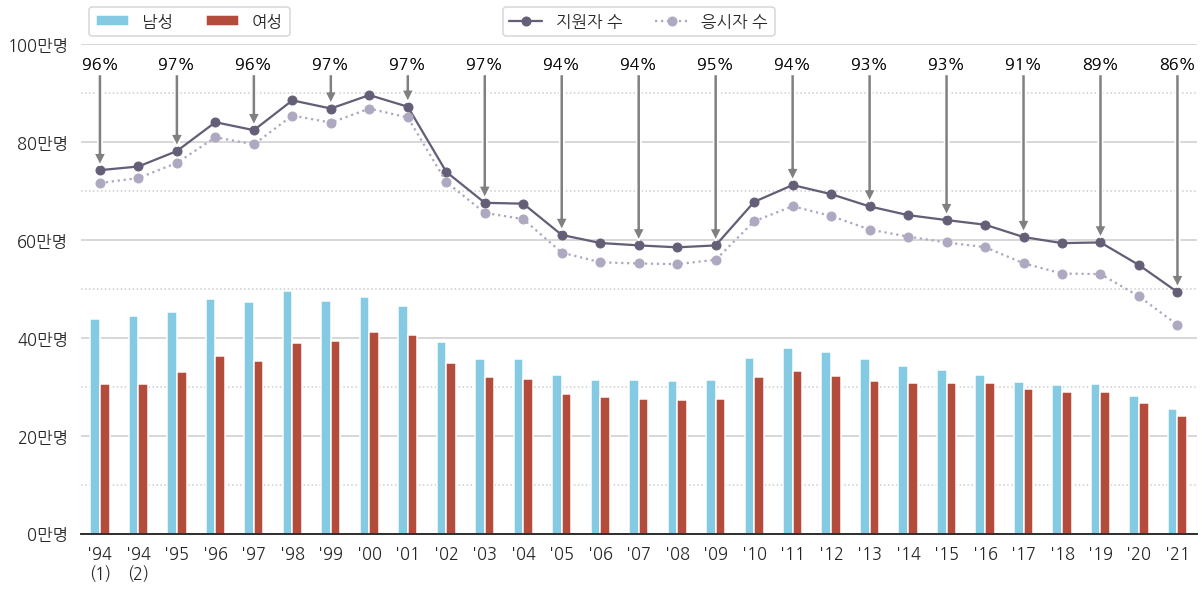

In [36]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"] # 범례 이름 변경
ax.legend(handles=handles, labels=labels)

ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2) # 범례 바꾸기


handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))
ax.add_artist(legend0)

# 응시율 붙이기 1: 데이터 순서 사용하기
for i in range(0, df_sn.shape[0], 2):                      # 데이터 순서 기준 하나 건너 하나에 적용
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',  # 글자 : 응시율. 소수점 떼고.
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), # A : 응시자 수 + 10000 지점
                xytext=(i,950000),                         # B : 여백. 950만명 지점
                arrowprops={"facecolor":"gray"},           # ← : 회색.
                horizontalalignment='center',              # 글자 : 가운데 정렬
                fontsize=16, color="k", alpha=0.8)         # 글자 크기=16, 색상=검정, 불투명도=0.8


for i in df_sn.index.values[::2]:                        # index 기준 하나 건너 하나에 적용
    ax.annotate(f'{df_sn.loc[i, "num_test_rate"]:.0f}%',
                xy=(i, df_sn.loc[i, "num_total"]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)

+ 결과물은 정확히 동일합니다.

## **5. annotate에 legend 붙이기 : text**

+ 응시율을 넣었으니 이게 응시율인 줄 알게 해야 합니다.
+ 비어있는 오른쪽 위 공간에 legend를 넣읍시다.
+ `text()`를 사용하면 간단하게 넣을 수 있습니다.

+ text에 다양한 형태의 윤곽선을 두를 수 있다는 사실을 잘 모르는 분들이 많습니다.
+ `ax.text(bbox={"boxstyle":스타일})`에서 **스타일**에 해당하는 부분을 바꾸는 것으로 되는데 말입니다.
+ 총 9가지 스타일을 제공합니다.

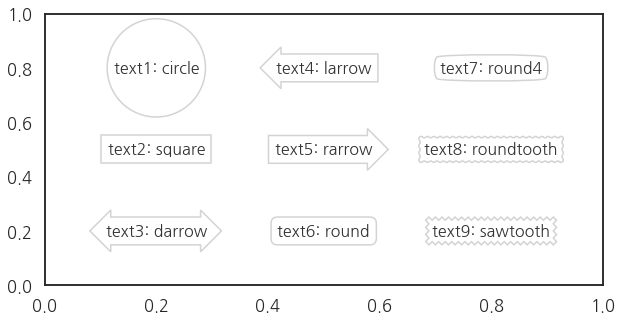

In [37]:
from itertools import product

fig, ax = plt.subplots(figsize=(10, 5))

position = [0.2, 0.5, 0.8]  # 글자가 표시될 x 좌표
positions = list(product(position, position[::-1])) # x, y 좌표 만들기

font_text = {"fontsize":16, "color":"0.2", "ha":"center", "va":"center"}  # text font 설정
style = ["circle", "square", "darrow", "larrow", "rarrow", "round", "round4", "roundtooth", "sawtooth"]  # matplotlib에서 제공하는 bounding box style

# 지정된 위치마다 text 삽입
for i, (p, s) in enumerate(zip(positions, style), 1):
    ax.text(p[0], p[1], f"text{i}: {s}", fontdict=font_text,
            bbox={"boxstyle":s, "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})

+ **fontdict**를 설정해서 전체적인 font를 제어합니다.
+ text가 삽입되는 지점을 일일이 넣어주기 보다 `product`를 이용해서 간단하게 만들어 줍니다.

+ `round`를 선택해서 text로 legend를 만들어 줍니다.
+ 간만에 전체 코드를 한번 적어봅니다.

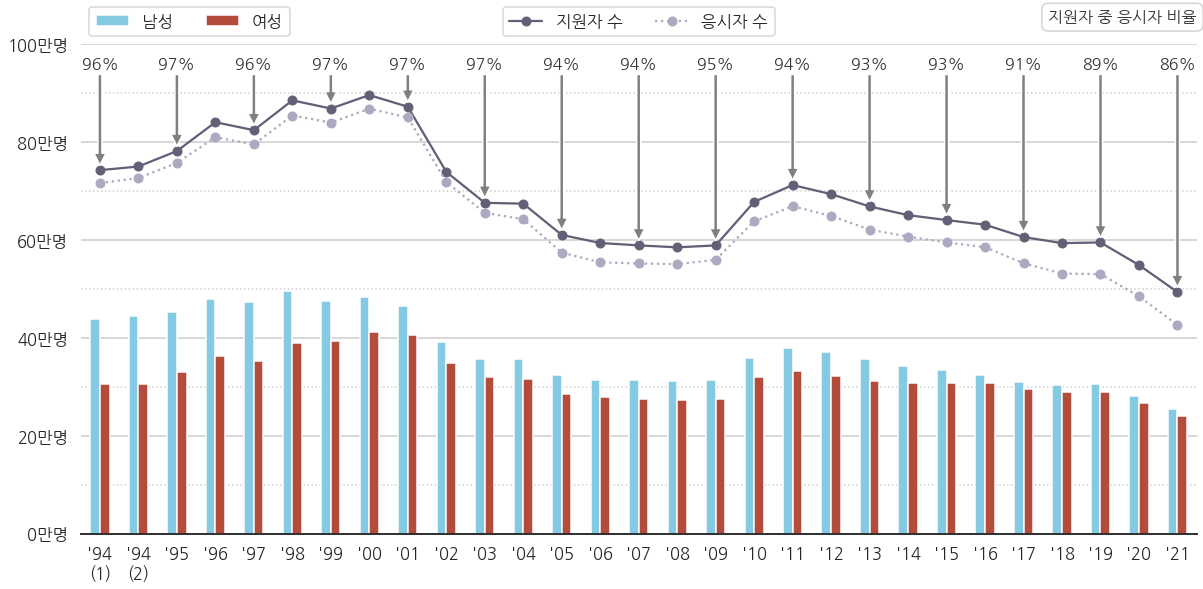

In [38]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# 응시율 붙이기 : 데이터 순서 사용하기
for i in range(0, df_sn.shape[0], 2):
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})


ax.add_artist(legend0)

+ 10학번 무렵부터 **응시율이 떨어지는 추세**가 보입니다.
+ **2021학년도 응시율이 수능 역사상 최저**를 기록했습니다.

+ 코로나 영향으로 인해 결시율 최고라는 기사가 있지만 최근 몇년간 추세를 보면 꼭 코로나 탓은 아닌 것 같습니다.
+ 수시 등의 영향으로 **수능을 볼 필요가 없어지는 수험생이 안전장치로 지원은 해 놓는 탓**에 응시율이 떨어지는 것이 아닌가 싶네요.
+ **결시자 중 수시 전형 비율**데이터가 있으면 더 명확할 것 같습니다.

### **6. 성비 구하기**

#### **6.1 여성 지원자 1인당 남성 지원자 수**

+ 응시율 저하 외에도 **남녀 성비의 변화**가 눈에 띕니다.
+ 일반적으로 성비를 `여성 1인당 남성의 수` 로 정의합니다.

In [39]:
# 성비 = 남성 수 / 여성 수
df_sn["num_M_rate"] = df_sn["num_M"]/df_sn["num_F"]

+ 응시율과 같은 요령으로 성비를 넣어봅시다.
+ 응시율을 넣던 for loop에 성비를 같이 넣습니다.

+ legend도 추가합니다.

Text(0.01, 0.57, '성비 (남성:여성)')

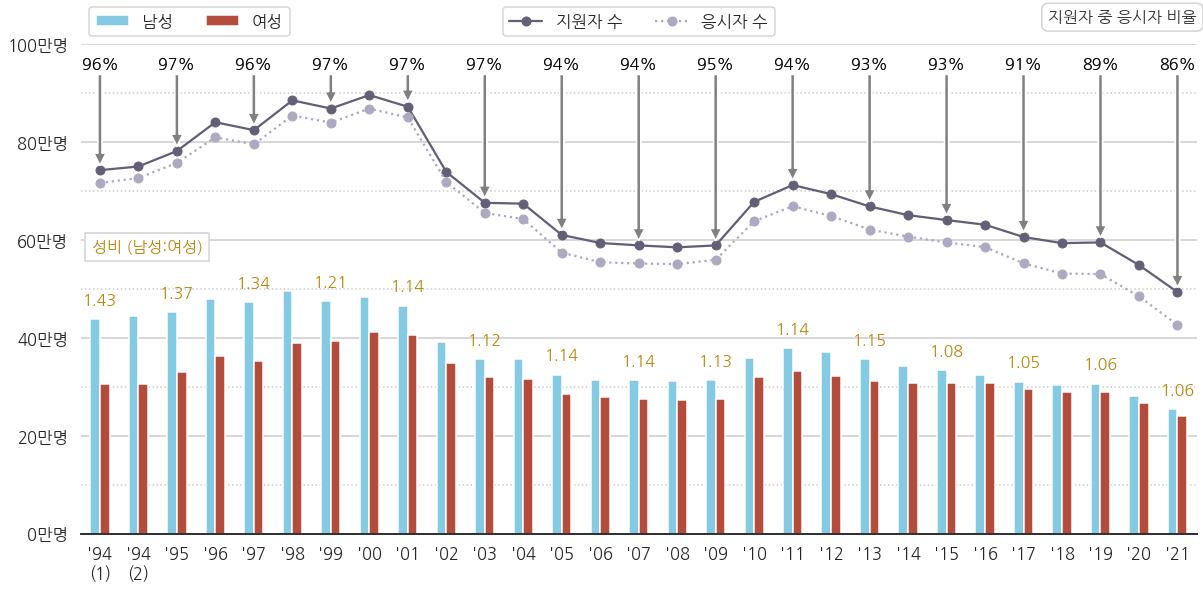

In [40]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# 응시율 붙이기 : 데이터 순서 사용하기
for i in range(0, df_sn.shape[0], 2):
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})


ax.add_artist(legend0)

for i in range(0, df_sn.shape[0], 2):
    # 응시율
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)
    # 성비       
    ax.annotate(f'{df_sn.loc[i, "num_M_rate"]:.2f}',
                xy=(i, df_sn.loc[i, "num_M"]), 
                xytext=(i, df_sn.loc[i, "num_M"]+30000),
                horizontalalignment='center',
                fontsize=16, color="darkgoldenrod")



# legend (4) 성비 (남성 : 여성)
ax.text(0.01, 0.57, "성비 (남성:여성)", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"darkgoldenrod", "ha":"left", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})


### **6.2 남성 지원자 1인당 여성 지원자 수**

+ 1.4를 넘어가던 성비가 차츰 줄ㄹ어서 1.06이 됩니다.
+ **여성의 대학 진학 시도가 더 많아진다**고 볼 수 있을 것 같습니다.
+ 여성 재수생 비율이 늘어나는 것인지는 현재로서는 알 수 없지만 그렇다고 해도 재수를 허용하는 비율이 증가한다고도 볼 수 있을 테니까요.

+ **여성 1인당** 기준을 **남성 1인당**으로 바꿔봅니다.

<AxesSubplot:>

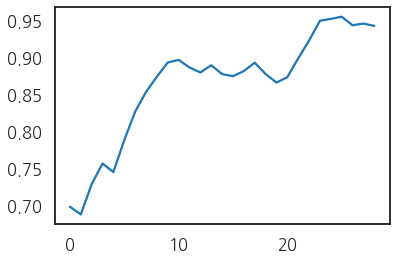

In [41]:
df_sn["num_F_rate"] = df_sn["num_F"]/df_sn["num_M"]
df_sn["num_F_rate"].plot()

+ 10년차와 20년차의 두 단계 점프가 선명합니다.
+ 이제까지 그린 그림의 배경으로 깔아보겠습니다.
+ 아래 코드를 추가합니다.

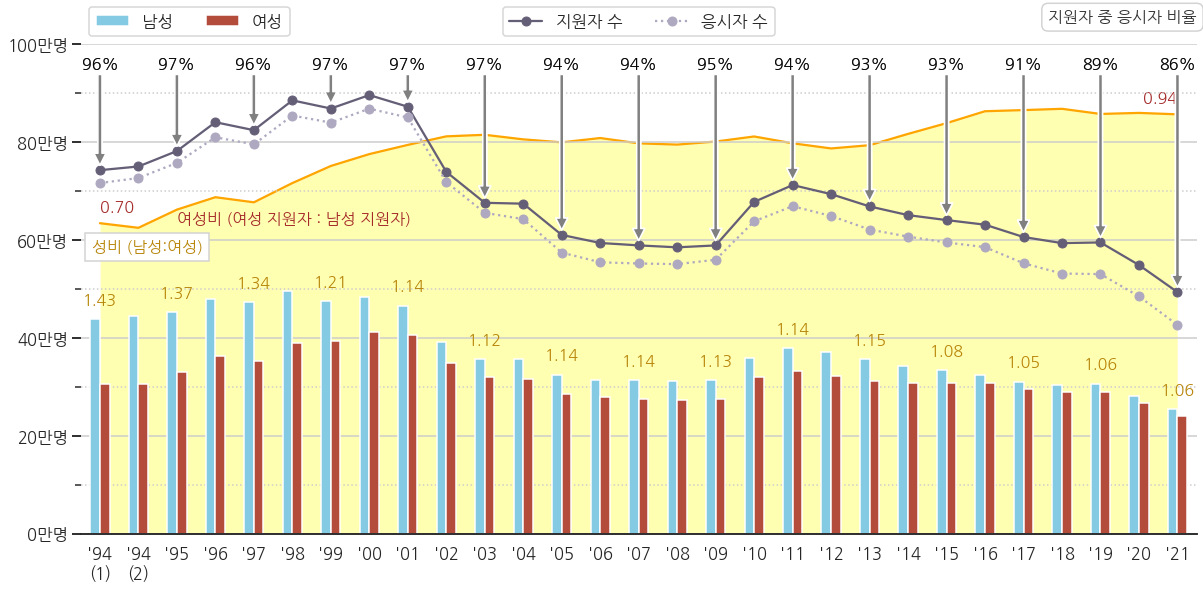

In [42]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

# 응시율 붙이기 : 데이터 순서 사용하기
for i in range(0, df_sn.shape[0], 2):
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
yticks_minor = ax.get_yticks(minor=True)
ax.set_yticks(yticks_minor[1:-1], minor=True)
yticklabels = ax.get_yticklabels(minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# major grid
ax.grid(axis="y", which="major")
ax.grid(axis="y", which="minor", ls=":")


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))

# legend (3) 응시율
ax.text(1, 1.04, "지원자 중 응시자 비율", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"0.2", "ha":"right", "va":"bottom"},
        bbox={"boxstyle":"round", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})


ax.add_artist(legend0)

for i in range(0, df_sn.shape[0], 2):
    # 응시율
    ax.annotate(f'{df_sn["num_test_rate"].iloc[i]:.0f}%',
                xy=(i, df_sn[ "num_total"].iloc[i]+10000), 
                xytext=(i,950000), 
                arrowprops={"facecolor":"gray"},
                horizontalalignment='center',
                fontsize=16, color="k", alpha=0.8)
    # 성비       
    ax.annotate(f'{df_sn.loc[i, "num_M_rate"]:.2f}',
                xy=(i, df_sn.loc[i, "num_M"]), 
                xytext=(i, df_sn.loc[i, "num_M"]+30000),
                horizontalalignment='center',
                fontsize=16, color="darkgoldenrod")



# legend (4) 성비 (남성 : 여성)
ax.text(0.01, 0.57, "성비 (남성:여성)", transform=ax.transAxes,
        fontdict={"fontsize":16, "color":"darkgoldenrod", "ha":"left", "va":"bottom"},
        bbox={"boxstyle":"square", "pad":0.4, "facecolor":"w", "edgecolor":"lightgray"})





ax.set_facecolor("none") # 이 코드를 작성해야 밑에 코드들과 합쳐질 수 있다.

# 여성비 
ax_F = ax.twinx()  # x축을 공유하면서 오른쪽 y축을 다른 스케일로 사용하는 axes 선언
ax_F.fill_between(df_sn.index, df_sn["num_F_rate"], 0, facecolor="yellow", alpha=0.3, zorder=0)  # 넓이 그리기
ax_F.plot(df_sn.index, df_sn["num_F_rate"], color="orange")  # 윤곽선 강조
ax_F.set_ylim(0, 1.1) # y 범위 설정
ax_F.axis(False)      # 모든 spines를 보이지 않게

# 여성비 눈금이 없는 대신, 시작과 끝 지점 데이터로 정량정보 전달.
r_1994 = df_sn["num_F_rate"].iloc[0]  # 1994학년도 1차시
r_2021 = df_sn["num_F_rate"].iloc[-1] # 2021학년도
for idx, r, ha in zip([0, df_sn.shape[0]-1], [r_1994, r_2021], ["left", "right"]): # 데이터 삽입
    ax_F.text(idx, r+0.02, f'{r:.2f}', fontdict={"fontsize":16, "color":"brown", "ha":ha, "va":"bottom"})

# 새로 삽입된 데이터에 대한 정보 전달
ax_F.text(2, df_sn["num_F_rate"].iloc[0], "여성비 (여성 지원자 : 남성 지원자)", 
          fontdict={"fontsize":16, "color":"brown", "ha":"left"})

# axes 순서
ax_F.set_zorder(0)  # 여성비 데이터를 뒤로
ax.set_zorder(1)    # 다른 데이터를 앞으로

### **6.3 강조점 변경**

+ 처음에는 단순히 수능 년도별 인원을 그려봤는데, **응시율**과 **여성비**를 도출했습니다.
+ 이번 plot의 주인공을 이것으로 해 봅시다.
+ 전체 plot에서 이 둘을 부각시키고 나머지를 부가 요소로 돌립니다.

+ 다음과 같은 과정을 거쳐 강조점을 변경하려고 합니다.
    1. **응시율,여성비**만 밝게, 나머지 어둡게
    2. 응시율과 여성비 **legend**를 강조, 나머지는 숨기기
    3. 전체 그림에서 응시율, 여성비 외 **면적 비중 축소**
    
+ 그 결과, 다음과 같은 그림을 얻었습니다.

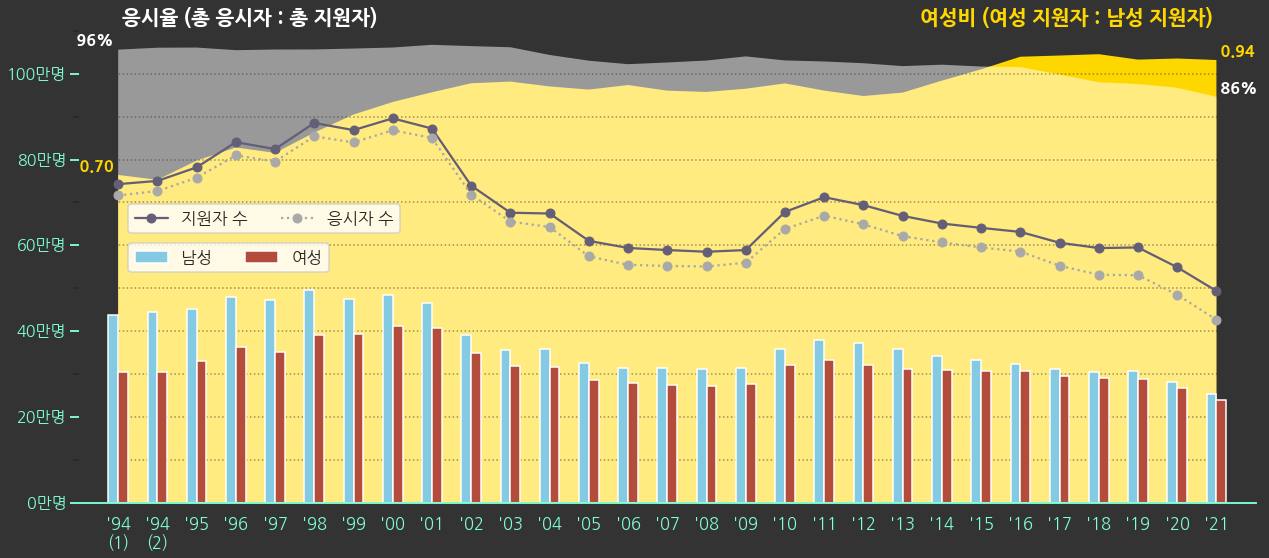

In [43]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)
fig.set_facecolor("0.2")
ax.set_facecolor("none")

# 여성비 
ax_F = ax.twinx()
ax_F.fill_between(df_sn.index, df_sn["num_F_rate"], 0, facecolor="gold", edgecolor="none", zorder=0)
ax_F.set_ylim(0, 1.05)
ax_F.axis(False)

r_1994 = df_sn["num_F_rate"].iloc[0]
r_2021 = df_sn["num_F_rate"].iloc[-1]
for idx, r, ha in zip([0, df_sn.shape[0]-1], [r_1994, r_2021], ["right", "left"]):
    ax_F.text(idx, r+0.02, f' {r:.2f} ', 
              fontdict={"fontsize":16, "color":"gold", "ha":ha, "va":"center", "fontweight":"bold"})

ax_F.text(df_sn.shape[0]-1.1, 1.02, "여성비 (여성 지원자 : 남성 지원자)", 
          fontdict={"fontsize":20, "color":"gold", "ha":"right", "fontweight":"bold"}, zorder=2)

# axes 순서
ax_F.set_zorder(0)
ax.set_zorder(1)

# 응시율
ax_F.fill_between(df_sn.index, df_sn["num_test_rate"]/100, 0, 
                  facecolor="1", edgecolor="none", alpha=0.5)

tr_1994 = df_sn["num_test_rate"].iloc[0]/100
tr_2021 = df_sn["num_test_rate"].iloc[-1]/100
for idx, tr, ha in zip([0, df_sn.shape[0]-1], [tr_1994, tr_2021], ["right", "left"]):
    ax_F.text(idx, tr+0.02, f' {tr*100:.0f}% ', 
              fontdict={"fontsize":16, "color":"w", "ha":ha, "va":"center", "fontweight":"bold"})

ax_F.text(0.1, 1.02, "응시율 (총 응시자 : 총 지원자)", 
          fontdict={"fontsize":20, "color":"w", "ha":"left", "fontweight":"bold"}, zorder=2)

# 남녀 지원자
df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F}, zorder=1)

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수", zorder=1)
ax.plot(df_sn["num_test"], 'o:', color='darkgray', label="응시자 수", zorder=1)

# x, y축 범위
ax.set_xlim(-1, df_sn.shape[0])
ax.set_ylim(0, 1150000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))
ax.yaxis.set_minor_formatter('{x:.0f}')

# major grid
ax.grid(axis="y", which="major", color="0.2", alpha=0.5, ls=":")
ax.grid(axis="y", which="minor", color="0.2", alpha=0.5, ls=":")

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]], 
                   fontdict={"fontsize":16, "color":"aquamarine", "ha":"right", "va":"center"})
ax.set_yticklabels([], minor=True)

# xticks
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_color("aquamarine")
ax.tick_params(axis='both', colors='aquamarine')

# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0.035, 0.45))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower left", bbox_to_anchor=(0.035, 0.53))

ax.add_artist(legend0)

fig.tight_layout(rect=[0.05,0.05,0.95,0.95])

+ 코드는 위와 같습니다.